<img src="Task_12.png" alt="drawing" width="800"/>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

%matplotlib inline

Входные данные

[ 0.          0.05118012  0.10222663  0.15300626  0.20338645  0.25323565
  0.30242374  0.35082231  0.39830499  0.44474783  0.49002958  0.53403203
  0.5766403   0.61774315  0.65723328  0.69500759  0.73096746  0.76501903
  0.79707338  0.82704684  0.85486115  0.88044371  0.90372772  0.9246524
  0.94316312  0.95921155  0.97275581  0.98376052  0.99219697  0.99804311
  1.00128371  1.00191028  0.99992121  0.99532167  0.98812369  0.97834604
  0.96601427  0.95116056  0.93382368  0.91404891  0.89188787  0.86739841
  0.84064447  0.81169589  0.78062825  0.74752266  0.71246555  0.67554843
  0.63686768  0.5965243   0.5546236   0.51127497  0.46659158  0.42069009
  0.37369033  0.32571499  0.27688934  0.22734083  0.17719882  0.12659421
  0.07565913  0.02452653 -0.02667009 -0.07779706 -0.12872092 -0.17930872
 -0.2294284  -0.2789491  -0.32774154 -0.37567835 -0.42263437 -0.46848702
 -0.5131166  -0.55640659 -0.59824398 -0.63851954 -0.67712812 -0.71396895
 -0.74894582 -0.78196744 -0.81294759 -0.8418054  -0.

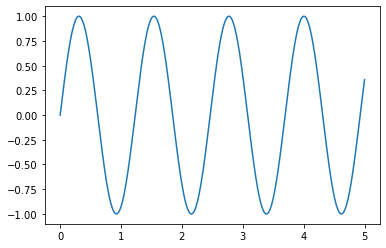

In [79]:
a_0 = 1
a_1 = 0.002

w_0 = 5.1
w_1 = 5


DURATION = 5
SAMPLE_RATE = 100


t = np.linspace(0, DURATION, SAMPLE_RATE*DURATION)

f = lambda t: a_0*np.sin(w_0*t) + a_1*np.sin(w_1*t)
F = f(t)
print(F)
plt.plot(t, f(t))

In [80]:
yf = fft(F)
xf = fftfreq(DURATION*SAMPLE_RATE, 1/SAMPLE_RATE)

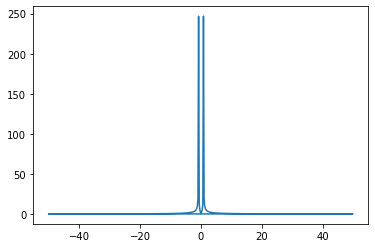

In [81]:

#plt.plot(x)
plt.plot(xf, np.abs(yf))

In [82]:
import matplotlib.pyplot as plt

def file_writer(name_of_file, arr_1, arr_2):
    with open(name_of_file, "w") as file:
        for index in  range(len(arr_1)):
            file.write(str(arr_1[index]) + "\t" + str(arr_2[index]) + "\n")

def painter(arr_of_args, arr_of_val_1, arr_of_val_2, title_1, title_2):
    plt.figure(1)
    plt.title(title_1)
    plt.xlabel("Frequency")
    plt.ylabel("|f(w)| ^ 2")
    # plt.plot(arr_of_args, arr_of_val_1)
    plt.semilogy(arr_of_args, arr_of_val_1)

    plt.figure(2)
    plt.title(title_2)
    plt.xlabel("Frequency")
    plt.ylabel("|f(w)| ^ 2")
    # plt.plot(arr_of_args, arr_of_val_2)
    plt.semilogy(arr_of_args, arr_of_val_2)
    plt.show()

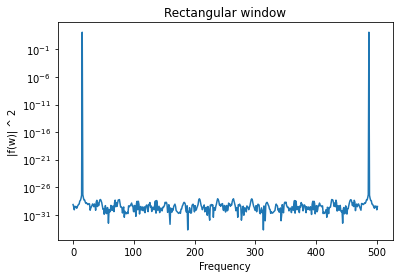

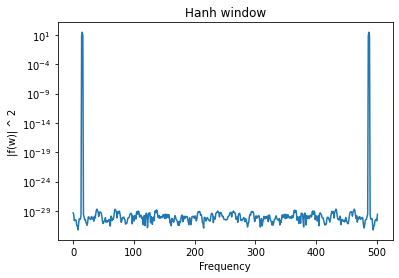

In [84]:
import numpy as np


freq_zero = float(input("Please, enter a frequency of sinus: "))
size_of_window = int(input("Please, enter integer size of the window: "))
max_val = 2 * np.pi * (1 - 1. / size_of_window)
tick = max_val / size_of_window
x = np.linspace(0, max_val, size_of_window)
# Rectangular window.
rect_window_values_abs_square = (np.abs(np.fft.fft(np.sin(freq_zero * x))) ** 2) / size_of_window
# Hahn window.
Hanh_window_values_abs_square = (np.abs(np.fft.fft(np.hanning(size_of_window + 1)[0:size_of_window] * np.sin(freq_zero * x))) ** 2) / size_of_window

frequencies = np.linspace(0, 2 * np.pi / tick, size_of_window)
# Painting of data.
painter(frequencies, rect_window_values_abs_square, Hanh_window_values_abs_square, "Rectangular window", "Hanh window")


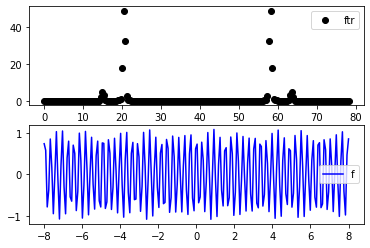

In [85]:
from math import *
import numpy as np
import matplotlib.pyplot as plt


w = 15
w2 = 20.5
N = 200

t1 = -8
t2 = 8

def f(x):
    return 0.1*np.sin(w*x) + np.cos(w2*x)
    #return np.exp(1j*x*w*pi)
#    return np.exp(-x)
def h(k, n):
    return 0.5*(1-cos(2*pi*k/n))


def DFT(f, N, t1, t2):
    x = np.linspace(t1, t2, N, endpoint = False)
    ftr = []
    w0 = []
    for i in range(0, N):
        ftri = 0
        for k in range(0, N) :
            ftri += f(*[x[k]])*np.exp(2*pi*(1j)*i*k/N)*h(k,N)
            #ftri += f(*[x[k]])*np.exp(2*pi*(1j)*i*k/N)
        ftr.append(abs(ftri))
        w0.append(2*pi*i/(t2-t1))
        #w0.append(i)
    return [w0, ftr]


x = np.linspace(t1, t2, N)
[w0, ftr] = DFT(f, N, t1, t2)


plt.subplot(211)
plt.plot(w0, ftr, 'ko', label = 'ftr')
plt.legend()
plt.subplot(212)
plt.plot(x, f(x), 'b-', label = 'f')
plt.legend()
plt.show()